In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

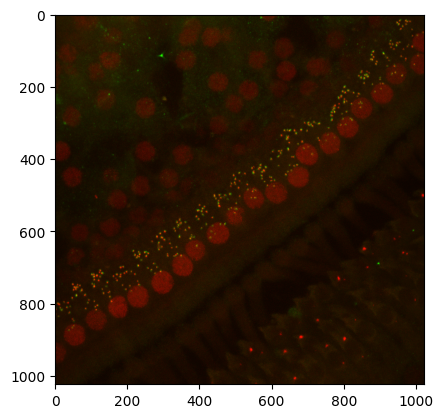

In [2]:
ruta = "Imagen.tiff"
imagen = cv2.imread(ruta)
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB) #Por alguna razón, cv2 lee las imagenes en BGR, así que hay que convertirlas a RGB
plt.imshow(imagen)

En esta imagen se muestran las sinapsis presinápticas (en rojo) y postsinápticas (en verde) de células ciliadas internas. A través de estas sinapsis se transmite la información auditiva desde la cóclea hacia el resto del cerebro. Cuando las sinapsis pre y post se superponen (colocalizan), podemos contarlas como una sola sinapsis.

Cada núcleo visible en la imagen corresponde a una célula. El desafío consiste en determinar cuántas sinapsis presenta cada célula. Para lograrlo, aprovecharemos el canal azul para agregar una capa con contornos imaginarios que delimiten cada célula. De este modo, podremos cuantificar la cantidad de sinapsis por célula.

In [69]:
imagen.shape

(1024, 1024, 3)

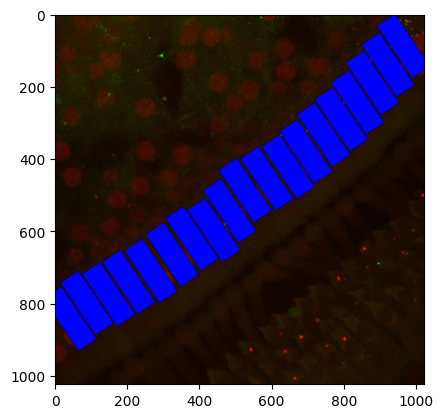

In [3]:
ruta = "Imagen_con_rectangulos.tif"
imagen_con_rectangulos = cv2.imread(ruta)
imagen_con_rectangulos = cv2.cvtColor(imagen_con_rectangulos, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_con_rectangulos)

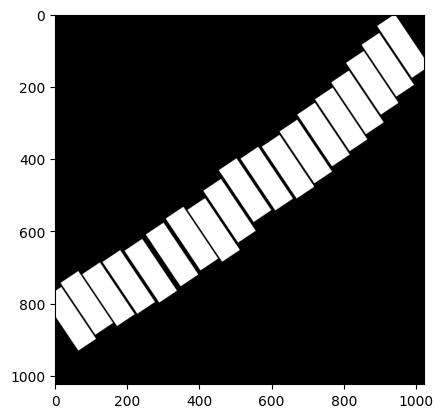

In [4]:
canal_azul = imagen_con_rectangulos[:,:,2]
plt.imshow(canal_azul, cmap='gray')

In [6]:
#Los contornos de los rectangulos

contornos_rectangulos, hierarchy = cv2.findContours(image = canal_azul, mode = cv2.RETR_LIST, method = cv2.CHAIN_APPROX_NONE)

In [73]:
len(contornos_rectangulos)

19

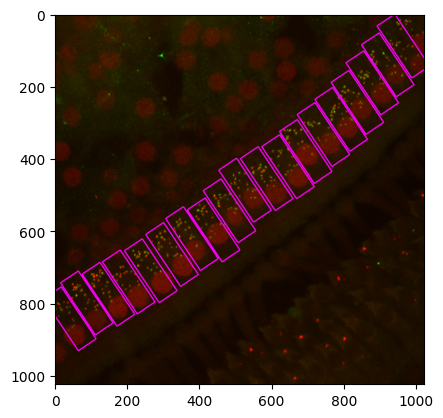

In [7]:
cv2.drawContours(image = imagen, contours = contornos_rectangulos, contourIdx = -1, color = (255,0,255), thickness = 2)
plt.imshow(imagen)

Ahora te queda encontrar los contornos de las sinapsis, es decir, donde hay marca roja y verde al mismo tiempo (ojo con el ruido), Contarlas y devolver el resultado para cada rectangulo.